In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import numpy as np
import io
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Import API key
from config import geoapify_key


In [2]:
 # Downloading the csv file from your GitHub account
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/brown016340/Project-1/development/Resources/2018_Squirrel_Data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
squirrel_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
squirrel_df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
# Total Population of observations of squirrels in dataset
population_df = pd.DataFrame(squirrel_df["Primary Fur Color"].value_counts())
population_df

,count
Primary Fur Color,
Gray,2473
Cinnamon,392
Black,103


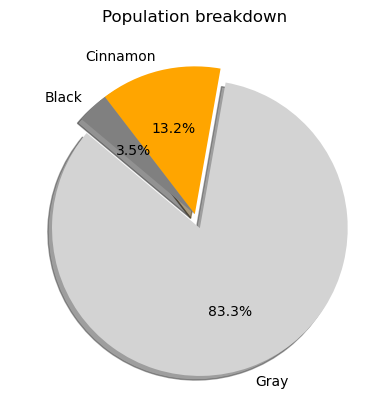

In [4]:
# Do a pie plot to compare the numbers of each color squirrel
labels = ["Gray", "Cinnamon", "Black"]
sizes = population_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Population breakdown")

plt.show()

In [5]:
# Lets get a total for the number of times a given behavior is exhibited and not exhibited
squirrel_df["Approaches"].value_counts()

Approaches
False    2845
True      178
Name: count, dtype: int64

In [6]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Approaches is True
approaches = squirrel_df[squirrel_df["Approaches"] == True]

# Reset Index
approaches = approaches.reset_index(drop=True)

approaches.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.957956,40.795934,38C-PM-1014-09,38C,PM,10142018,9,Adult,Black,NaN,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9579564338627 40.7959337795027)
1,-73.958497,40.798289,40B-AM-1019-03,40B,AM,10192018,3,Juvenile,Gray,White,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9584970643213 40.7982886348696)
2,-73.974563,40.769260,5E-AM-1008-06,05E,AM,10082018,6,Adult,Cinnamon,White,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9745630038492 40.7692602628745)
3,-73.961071,40.791483,32D-AM-1013-06,32D,AM,10132018,6,Adult,Cinnamon,NaN,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9610705592868 40.7914829661051)
4,-73.952868,40.792581,36I-PM-1007-13,36I,PM,10072018,13,Adult,Gray,Cinnamon,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9528682507794 40.7925807808307)


In [7]:
# What is the breakdown of the number of squirrels with each fur color that approached?
approaches_df = pd.DataFrame(approaches["Primary Fur Color"].value_counts())
approaches_df

,count
Primary Fur Color,
Gray,126
Cinnamon,44
Black,6


In [8]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
approaches_percent = pd.merge(approaches_df, population_df, on="Primary Fur Color")

# Rename columns
approaches_percent = approaches_percent.rename(columns={"count_x": "Approaches", "count_y": "Population"})
approaches_percent["Approaches_Percentage"] = approaches_percent["Approaches"] / approaches_percent["Population"]
approaches_percent["Approaches_Percentage"] = approaches_percent["Approaches_Percentage"].map("{:,.2%}".format)

approaches_percent

,Approaches,Population,Approaches_Percentage
Primary Fur Color,,,
Gray,126,2473,5.10%
Cinnamon,44,392,11.22%
Black,6,103,5.83%


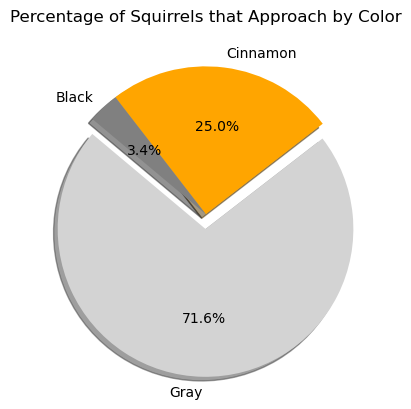

In [9]:
# Lets make a pie chart for the ones that approach, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = approaches_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Approach by Color")

plt.show()

In [10]:
# Narrow down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail Flags is True
flags = squirrel_df[squirrel_df["Tail flags"] == True]

# Reset Index
flags = flags.reset_index(drop=True)

flags.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,-73.967113,40.778486,17F-AM-1007-07,17F,AM,10072018,7,Adult,Gray,White,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9671130680114 40.7784859700171)
2,-73.974207,40.775796,12B-AM-1007-01,12B,AM,10072018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9742073452913 40.7757957380463)
3,-73.954665,40.794764,38G-PM-1020-09,38G,PM,10202018,9,Adult,Gray,"Cinnamon, White",...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9546654184146 40.7947639241491)
4,-73.964475,40.788384,28C-PM-1006-01,28C,PM,10062018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,False,True,gnd to tree,POINT (-73.964474836001 40.7883840104749)


In [11]:
# What is the breakdown of the number of squirrels with each fur color that flagged their tail?
flags_df = pd.DataFrame(flags["Primary Fur Color"].value_counts())
flags_df

,count
Primary Fur Color,
Gray,122
Cinnamon,26
Black,6


In [16]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
flags_percent = pd.merge(flags_df, population_df, on="Primary Fur Color")

# Rename columns
flags_percent = flags_percent.rename(columns={"count_x": "Flags", "count_y": "Population"})
flags_percent["Flags_Percentage"] = flags_percent["Flags"] / flags_percent["Population"]
flags_percent["Flags_Percentage"] = flags_percent["Flags_Percentage"].map("{:,.2%}".format)

flags_percent

,Flags,Population,Flags_Percentage
Primary Fur Color,,,
Gray,122,2473,4.93%
Cinnamon,26,392,6.63%
Black,6,103,5.83%


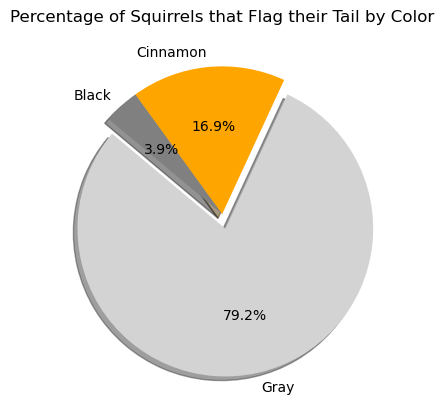

In [13]:
# Lets make a pie chart for the ones that flagged, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = flags_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Flag their Tail by Color")

plt.show()

In [14]:
# Narrow down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail Twitches is True
twitches = squirrel_df[squirrel_df["Tail twitches"] == True]

# Reset Index
twitches = twitches.reset_index(drop=True)

twitches.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
1,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
2,-73.964003,40.782031,22F-PM-1014-06,22F,PM,10142018,6,Adult,Gray,NaN,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9640032826529 40.7820309825448)
3,-73.964987,40.776493,16I-AM-1008-01,16I,AM,10082018,1,Adult,Cinnamon,"Gray, White",...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9649866016038 40.7764929694457)
4,-73.967063,40.773499,12I-AM-1013-01,12I,AM,10132018,1,Adult,Cinnamon,White,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9670628558161 40.77349914209411)


In [15]:
# What is the breakdown of the number of squirrels with each fur color that twitched their tail?
twitches_df = pd.DataFrame(twitches["Primary Fur Color"].value_counts())
twitches_df

,count
Primary Fur Color,
Gray,338
Cinnamon,75
Black,18


In [18]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
twitches_percent = pd.merge(twitches_df, population_df, on="Primary Fur Color")

# Rename columns
twitches_percent = twitches_percent.rename(columns={"count_x": "Twitches", "count_y": "Population"})
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches"] / flags_percent["Population"]
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches_Percentage"].map("{:,.2%}".format)

twitches_percent

,Twitches,Population,Twitches_Percentage
Primary Fur Color,,,
Gray,338,2473,13.67%
Cinnamon,75,392,19.13%
Black,18,103,17.48%
